<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [5]</a>'.</span>

In [1]:
# Parameters
RAW_DIR = "data/raw/"
PROCESSED_DIR = "data/processed/"
RANDOM_STATE = 42


In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path

# Ajusta:
DATA_PATH = Path("/Users/alonso/Downloads/Tesis_SIEM_ML/data/raw/logs_unificados_limpios.csv")  
TARGET = "label"                          

df = pd.read_csv(DATA_PATH)
df.head()

,@timestamp,host.ip,rule.name,rule.category,rule.description,file.path,file.hash.md5,file.hash.sha256,virus.name,danger.type,source,hour,dayofweek,month,year
0,desconocido,2313,2,1,11,1821,3288,4068,469,39,1,desconocido,desconocido,desconocido,desconocido
1,desconocido,2395,2,20,8,4609,2717,2619,260,45,1,desconocido,desconocido,desconocido,desconocido
2,desconocido,1471,2,18,8,1564,2221,1596,331,45,1,desconocido,desconocido,desconocido,desconocido
3,desconocido,1471,2,7,8,1564,2221,1596,332,45,1,desconocido,desconocido,desconocido,desconocido
4,desconocido,2376,2,20,8,4991,182,4450,359,45,1,desconocido,desconocido,desconocido,desconocido


In [3]:
df.info()
df.describe(include="all").T
missing = df.isna().mean().sort_values(ascending=False)
missing.head(20)
dup_rate = df.duplicated().mean()
dup_rate

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856808 entries, 0 to 856807
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   @timestamp        856808 non-null  object
 1   host.ip           856808 non-null  int64 
 2   rule.name         856808 non-null  int64 
 3   rule.category     856808 non-null  int64 
 4   rule.description  856808 non-null  int64 
 5   file.path         856808 non-null  int64 
 6   file.hash.md5     856808 non-null  int64 
 7   file.hash.sha256  856808 non-null  int64 
 8   virus.name        856808 non-null  int64 
 9   danger.type       856808 non-null  int64 
 10  source            856808 non-null  int64 
 11  hour              856808 non-null  object
 12  dayofweek         856808 non-null  object
 13  month             856808 non-null  object
 14  year              856808 non-null  object
dtypes: int64(10), object(5)
memory usage: 98.1+ MB


np.float64(0.9428086572487652)

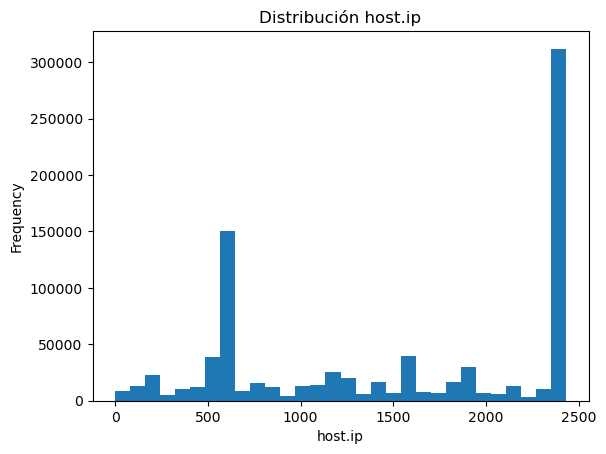

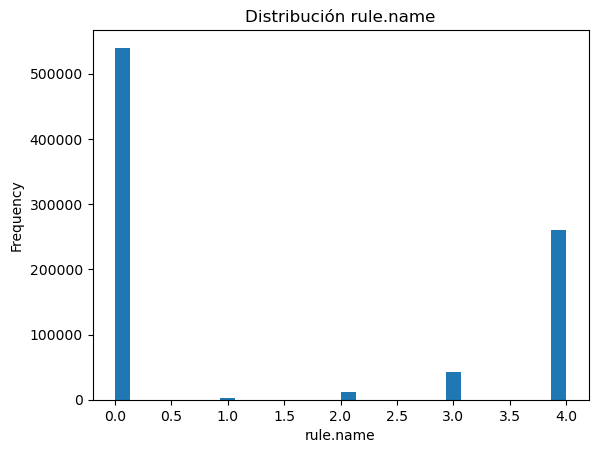

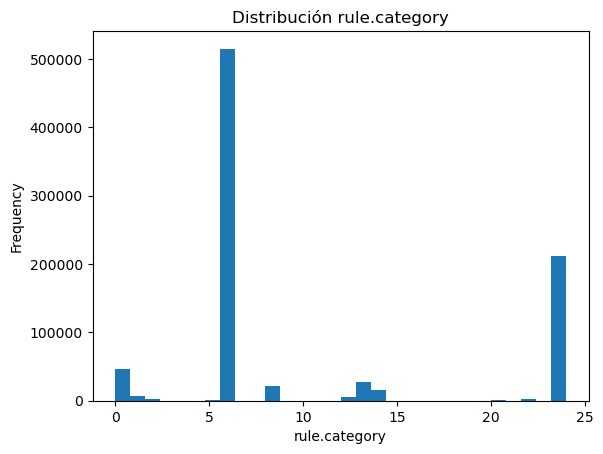

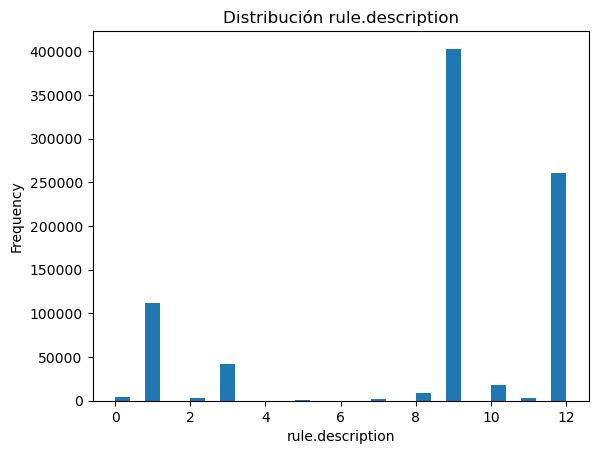

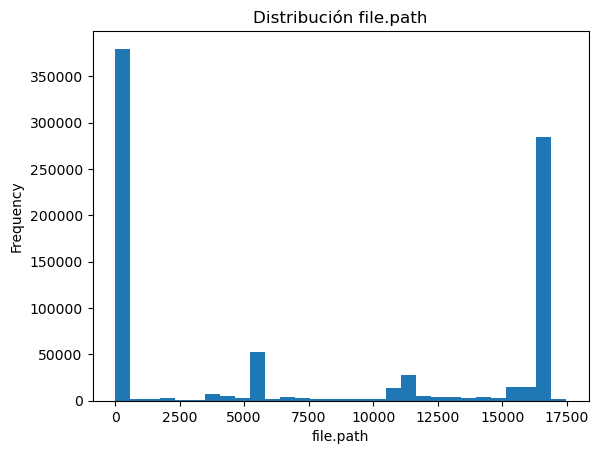

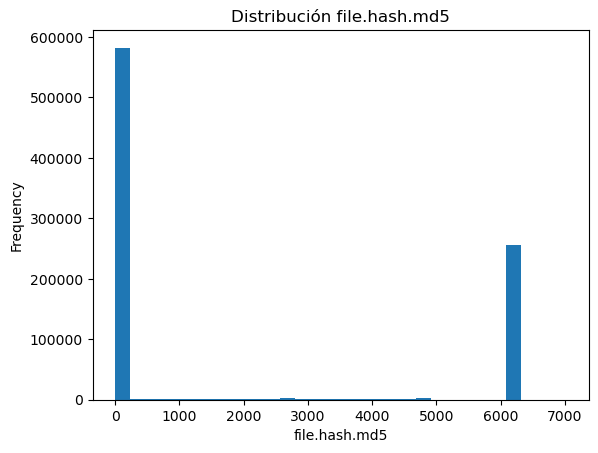

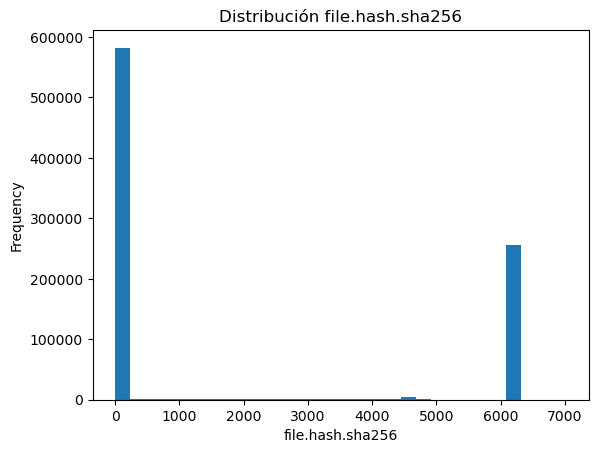

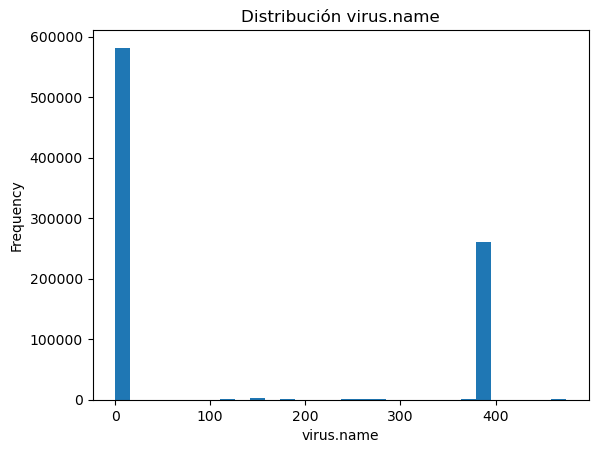

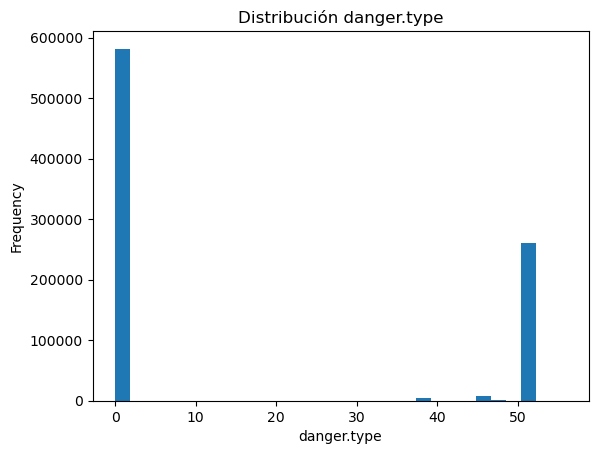

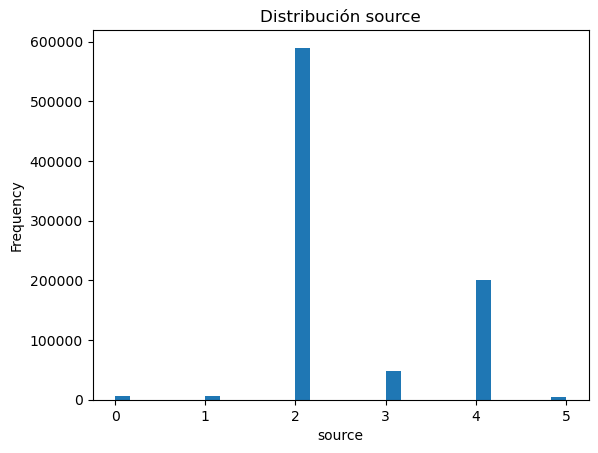

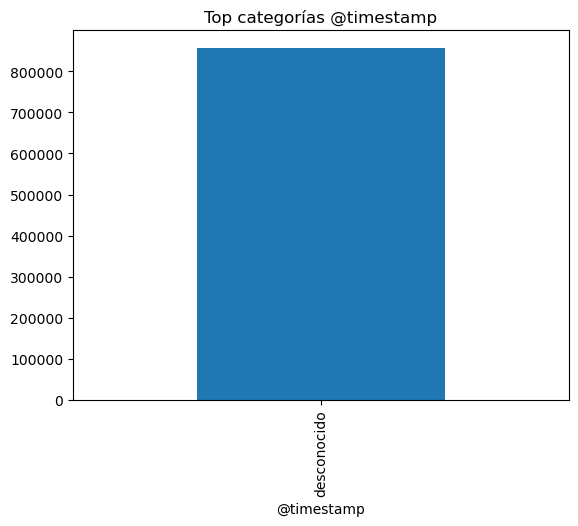

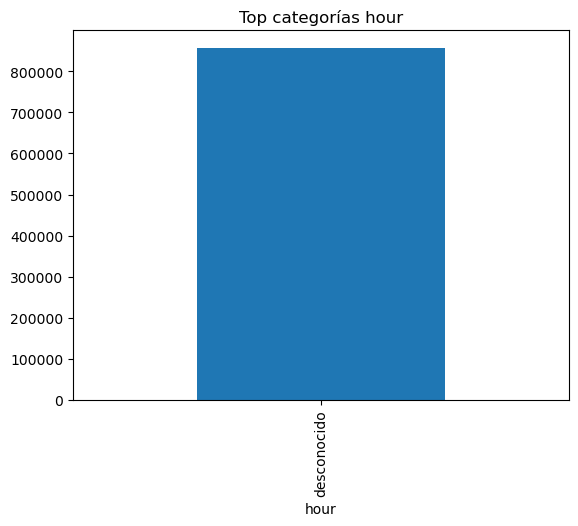

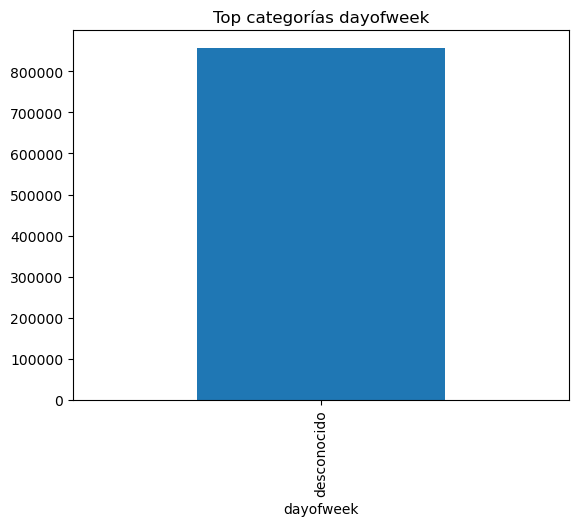

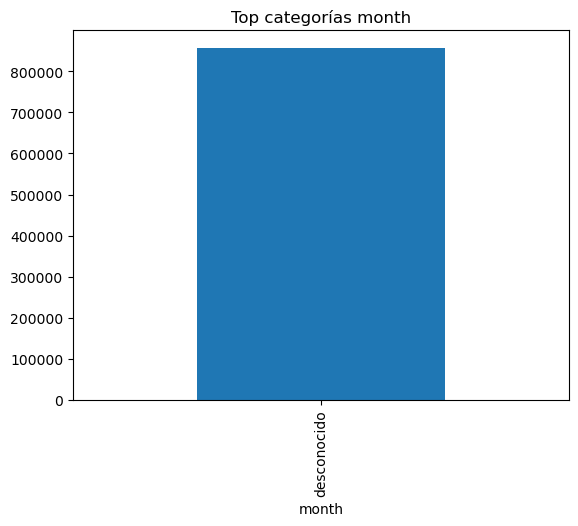

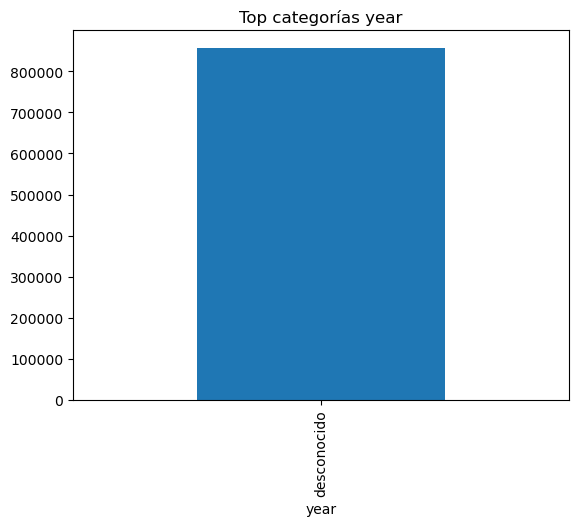

In [4]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = [c for c in df.columns if c not in num_cols + [TARGET]]

# numéricas
for c in num_cols:
    if c == TARGET: 
        continue
    df[c].plot(kind="hist", bins=30, title=f"Distribución {c}")
    plt.xlabel(c); plt.show()

# categóricas
for c in cat_cols:
    vc = df[c].value_counts().head(20)
    vc.plot(kind="bar", title=f"Top categorías {c}")
    plt.xlabel(c); plt.show()

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [5]:
if df[TARGET].dropna().isin([0,1]).all():
    corr = df[num_cols+[TARGET]].corr(numeric_only=True)[TARGET].sort_values(ascending=False)
    corr

if TARGET in df.columns:
    cls_vc = df[TARGET].value_counts(dropna=False)
    cls_pct = (cls_vc / len(df)).round(3)
    display(cls_vc, cls_pct)    

time_col = "timestamp"   # ajusta
if time_col in df.columns:
    df[time_col] = pd.to_datetime(df[time_col], errors="coerce")
    df = df.sort_values(time_col)
    # proporción de clase por mes
    cls_by_month = df.groupby(pd.Grouper(key=time_col, freq="M"))[TARGET].mean()
    cls_by_month.plot(title="Proporción de clase positiva por mes"); plt.show()


KeyError: 'label'

In [ ]:
drop_cols = []  
df1 = df.drop(columns=[c for c in drop_cols if c in df.columns]).copy()

df1 = df1.drop_duplicates()

df1 = df1.dropna(subset=[TARGET])  

df1.to_csv("data/processed/dataset_clean.csv", index=False)
df1.shape
